In [1295]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.metrics import pairwise_distances
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer

import numpy as np
import pandas as pd
from docx import Document
import docx
from youtube_transcript_api import YouTubeTranscriptApi
from nltk.util import ngrams
import re
from tensorflow.keras.preprocessing.text import Tokenizer

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
# import sklearn
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

# Learn the vocabulary
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts()

document_18 = docx.Document('S18.docx')
document_19 = docx.Document('S19.docx')
document_20 = docx.Document('S20.docx')

In [1296]:
para_18 = document_18.paragraphs
para_19 = document_19.paragraphs
para_20 = document_20.paragraphs

finalText18 = []
for para in para_18:
    finalText18.append(para.text)
finalText_s18 = '\n'.join(finalText18)

finalText19 = []
for para in para_19:
    finalText19.append(para.text)
finalText_s19 = '\n'.join(finalText19)

finalText20 = []
for para in para_20:
    finalText20.append(para.text)
finalText_s20 = '\n'.join(finalText20)
#for para in document_18:
#    print(para.text)

In [1297]:
import string
clean_text18 = re.sub('[%s]' % re.escape(string.punctuation), ' ', finalText_s18)
clean_text18 = clean_text18.lower()
clean_text18 = re.sub('\w*\d\w*', ' ', clean_text18)
split_s18 = clean_text18.split("\n\n")

clean_text19 = re.sub('[%s]' % re.escape(string.punctuation), ' ', finalText_s19)
clean_text19 = clean_text19.lower()
clean_text19 = re.sub('\w*\d\w*', ' ', clean_text19)
split_s19 = clean_text19.split("\n\n")

clean_text20 = re.sub('[%s]' % re.escape(string.punctuation), ' ', finalText_s20)
clean_text20 = clean_text20.lower()
clean_text20 = re.sub('\w*\d\w*', ' ', clean_text20)
split_s20 = clean_text20.split("\n\n")

In [1298]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

for i in range(0, len(split_s18)):
    my_text18 = (word_tokenize(split_s18[i]))
for i in range(0, len(split_s19)):
    my_text19 = (word_tokenize(split_s19[i]))
for i in range(0, len(split_s20)):
    my_text20 = (word_tokenize(split_s20[i]))
            

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jihyangseo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1299]:
dfa = pd.DataFrame()
dfa['text'] = split_s18
dfa['result'] = ['w','w','d','d','w','d','d','w','d','w','w','w','w','w','w','w','w','l','w','w','w','w','w']
dfa['season'] = ['1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1']

dfa19 = pd.DataFrame()
dfa19['text'] = split_s19
dfa19['result'] = ['w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','d','d','w','d','d','w','d','w','w','w','w','w','w','w','w','l','w','w','w','w','w']
dfa19['season'] = ['2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2']

dfa20 = pd.DataFrame()
dfa20['text'] = split_s20
dfa20['result'] = ['w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','w','l','w','w','w','w','w','w','l','w','w','w','w','w','w','w','w','w','w']
dfa20['season'] = ['3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3']

In [1300]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
set(stopwords.words('english'))
sw = nltk.corpus.stopwords.words('english')
sw.append('ve')
sw.append('don')
sw.append('did')
sw.append('like')
sw.append('ll')
sw.append('um')
sw.append('uh')
sw.append('well')
sw.append('really')
sw.append('things')
sw.append('think')
sw.append('yeah')
sw.append('one')
sw.append('us')
sw.append('would')
sw.append('game')
sw.append('go')
sw.append('tonight')
sw.append('today')
sw.append('know')
sw.append('creo')
sw.append('morgan')
sw.append('german')
sw.append('germany')
sw.append('don')
sw.append('james')
sw.append('carl')
sw.append('vinnie')
sw.append('sunday')
sw.append('van')
sw.append('gonna')
sw.append('super')
sw.append('music')
sw.append('boruc')
sw.append('chema')
sw.append('celia')
sw.append('please')
sw.append('lucky')
sw.append('unlucky')
sw.append('went')
sw.append('boruc')
sw.append('estos')
sw.append('cola')
sw.append('alibaba')
sw.append('group')
sw.append('weekend')
sw.append('ian')
sw.append('left')
sw.append('southampton')
sw.append('chelsea')
sw.append('leicester')
sw.append('hello')
sw.append('hands')
sw.append('god')
sw.append('ham')
sw.append('preseason')
sw.append('international')
sw.append('person')
sw.append('working')
sw.append('balls')
sw.append('tottenham')
sw.append('bayern')
sw.append('everton')
sw.append('must')
sw.append('terms')
sw.append('barcelona')
sw.append('crystal')
sw.append('steps')
sw.append('arsenal')
sw.append('west')
sw.append('villa')
sw.append('aston')
sw.append('others')
sw.append('mind')
sw.append('derby')
sw.append('allowed')
sw.append('six')
sw.append('nate')
sw.append('jurgen')
sw.append('record')
sw.append('free')
sw.append('whether')
sw.append('joe')
sw.append('morning')
sw.append('feeling')
sw.append('incredibly')
sw.append('adam')
sw.append('luck')
sw.append('nine')
sw.append('palace')
sw.append('high')
sw.append('honestly')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jihyangseo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1301]:
# COUNTVECTORIZE
# combining dataframes
combined = pd.concat([dfa,dfa19,dfa20])
combined = combined.replace(r'\n','', regex=True)
#combined_list = combined.values.tolist()
combined
cv = CountVectorizer(min_df = 8, max_df = 30, stop_words = sw)
sample = pd.DataFrame(combined['text']+','+combined['result']+','+combined['season'].astype('str'),columns=['Output'])

vectorized = cv.fit_transform(sample['Output'])
press_conf = pd.DataFrame(vectorized.toarray(), columns = cv.get_feature_names())

In [1302]:
# TFIDF
cv_tfidf = TfidfVectorizer(min_df=40, max_df=50, stop_words = sw)

X_tfidf = cv_tfidf.fit_transform(sample['Output'])
dt_tfidf = pd.DataFrame(X_tfidf.toarray(), columns = cv_tfidf.get_feature_names())

In [1303]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [1304]:
lda = LatentDirichletAllocation(n_components=4, random_state=0)
doc_topic_array = lda.fit_transform(press_conf)

In [1305]:
doc_topic_array

array([[1.67048237e-01, 8.27056585e-01, 2.93240264e-03, 2.96277565e-03],
       [4.10992556e-01, 4.96386162e-01, 3.13163949e-03, 8.94896420e-02],
       [1.68116891e-01, 8.25671399e-01, 3.12657652e-03, 3.08513369e-03],
       [3.58368667e-03, 9.89296959e-01, 3.53382419e-03, 3.58552993e-03],
       [2.46220454e-01, 3.92942146e-01, 2.98697380e-03, 3.57850427e-01],
       [4.57718761e-03, 7.03567771e-01, 4.67889574e-03, 2.87176145e-01],
       [2.06136410e-03, 5.47830655e-01, 4.47989901e-01, 2.11807974e-03],
       [2.60484766e-03, 7.46962061e-01, 2.47841824e-01, 2.59126733e-03],
       [4.21494738e-03, 5.62501647e-01, 4.24056399e-03, 4.29042842e-01],
       [3.36355461e-01, 4.12902597e-01, 2.48190750e-01, 2.55119286e-03],
       [3.77676918e-01, 3.22278639e-01, 2.96830185e-01, 3.21425728e-03],
       [2.77117742e-03, 6.10114793e-01, 3.84351590e-01, 2.76243877e-03],
       [3.41967863e-03, 9.89774754e-01, 3.40805614e-03, 3.39751148e-03],
       [2.31304331e-03, 2.35287530e-03, 9.93046849e

In [1306]:
display_topics(lda, cv.get_feature_names(), 13)


Topic  0
penalty, var, offside, foul, physical, decisive, competition, concerned, tricky, accept, box, cup, less

Topic  1
atmosphere, third, box, pieces, unbelievable, deserved, watch, break, momentum, corner, crowd, reaction, trent

Topic  2
mo, ali, serious, centre, alisson, hendo, naby, rhythm, millie, fabinho, smart, bobby, penalty

Topic  3
fantastic, virgil, title, fans, supporters, match, future, joel, slightly, coach, clubs, injured, miss


In [1307]:
# make weight readable
topic_list = ['referee','tactical','players','injury']
doc_topic = pd.DataFrame(doc_topic_array, columns = topic_list)
doc_topic

,referee,tactical,players,injury
0,0.167048,0.827057,0.002932,0.002963
1,0.410993,0.496386,0.003132,0.089490
2,0.168117,0.825671,0.003127,0.003085
3,0.003584,0.989297,0.003534,0.003586
4,0.246220,0.392942,0.002987,0.357850
...,...,...,...,...
103,0.000982,0.179528,0.000994,0.818495
104,0.993576,0.002114,0.002154,0.002157
105,0.001804,0.041799,0.500158,0.456239
106,0.000973,0.000987,0.000986,0.997054


In [1308]:
season = combined['season']
season

0     1
1     1
2     1
3     1
4     1
     ..
30    3
31    3
32    3
33    3
34    3
Name: season, Length: 108, dtype: object

In [1309]:
doc_topic.reset_index(inplace=True)


In [1310]:
x = pd.DataFrame(season)
x.reset_index(inplace=True)


In [1311]:
per_season = pd.concat([doc_topic,x], axis = 1)
per_season['season'] = per_season['season'].astype(int)

In [1312]:
per_season.to_csv("18-20.csv")

In [1313]:
per_season1 = per_season.loc[per_season['season'] == 1]
per_season2 = per_season.loc[per_season['season'] == 2]
per_season3 = per_season.loc[per_season['season'] == 3]
per_season1.to_csv("s18.csv")
per_season2.to_csv("s19.csv")
per_season3.to_csv("s20.csv")

In [1315]:
sw_word = sw
sw_word.append('good')
sw_word.append('play')
sw_word.append('player')
sw_word.append('players')
sw_word.append('team')
sw_word.append('lot')
sw_word.append('say')
sw_word.append('time')
sw_word.append('obviously')
sw_word.append('football')
sw_word.append('get')
sw_word.append('make')
sw_word.append('always')
sw_word.append('see')
sw_word.append('boy')

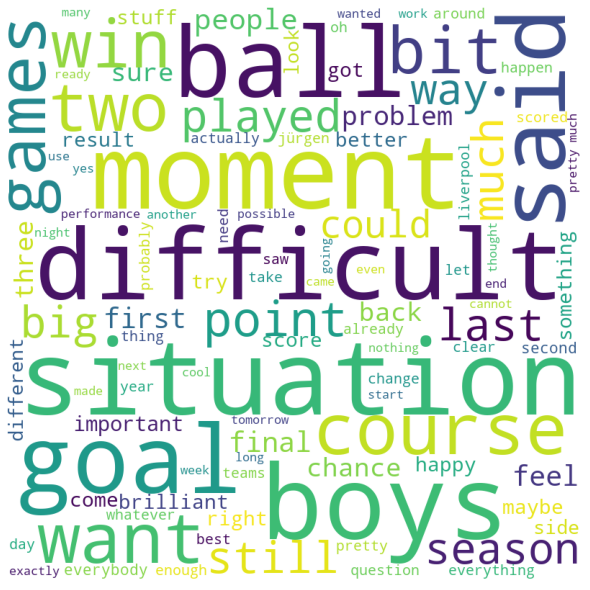

In [1316]:
comment_words = ''

for val in split_s18:
    
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+ " "

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = sw_word, max_words= 100,
                      min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

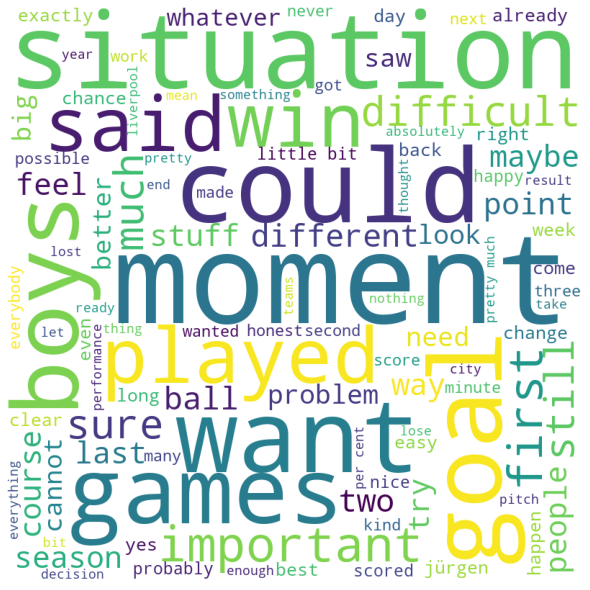

In [1317]:
comment_words = ''

for val in split_s19:
    
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+ " "

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = sw_word, max_words=100,
                      min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

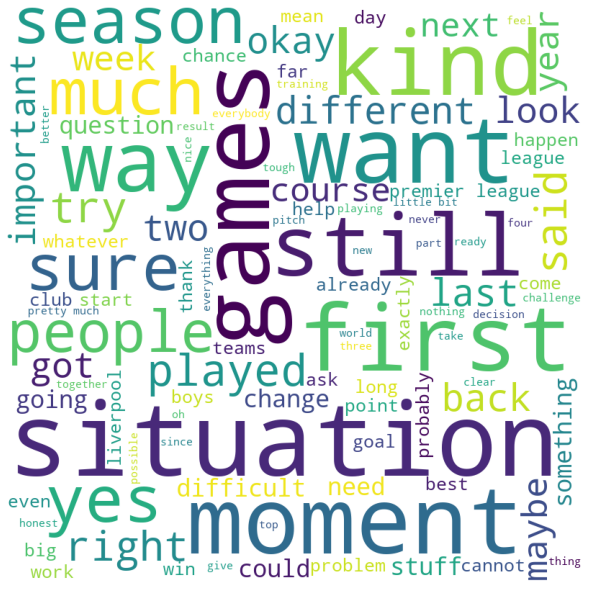

In [1318]:
comment_words = ''

for val in split_s20:
    
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+ " "

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = sw_word, max_words = 100,
                      min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [1319]:
s = []

for i in range(len(dfa["text"])):
    sia = SentimentIntensityAnalyzer()
    s.append(sia.polarity_scores(dfa["text"][i]))
    
for i in range(len(dfa19["text"])):
    sia = SentimentIntensityAnalyzer()
    s.append(sia.polarity_scores(dfa19["text"][i]))

for i in range(len(dfa20["text"])):
    sia = SentimentIntensityAnalyzer()
    s.append(sia.polarity_scores(dfa20["text"][i]))



In [1322]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=100, centers=3, n_features=4)

df = pd.DataFrame(X, columns=['referee','tactical','players','injury'])

kmeans = KMeans(n_clusters=4)

y = kmeans.fit_predict(df[['referee','tactical','players','injury']])

df['Cluster'] = y




In [1323]:
pca = PCA(2)
#Transform the data
data = pca.fit_transform(nmf_data)
#Initialize the class object
kmeans_on_nmf = KMeans(n_clusters = 4)
#predict the labels of clusters.
label = kmeans_on_nmf.fit_predict(data)
#Getting the Centroids
centroids = kmeans_on_nmf.cluster_centers_
u_labels = np.unique(label)
#plotting the results:
for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'todense'

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:

colors = ['red', 'lightblue', 'yellow', 'magenta']
topic_list = ['referee','tactical','players','injury']


# plt.bar(doc_topic_df[doc_topic_df['episode']==episode].time,\
#         doc_topic_df[doc_topic_df['episode']==episode].strength,\
#         width=5.1,color=colors[0], label=topic_list[0])

for i in range(3,18):
    plt.bar(per_season1[per_season1.time,\
            per_season1[per_season1.iloc[:,i],\
            bottom= per_season1[per_season1.iloc[:,i-1],\
            width=5.1,\
            color=colors[i-2],\
            label = topic_list[i-2])
plt.legend(bbox_to_anchor=(1.02, 1.02))
plt.title('Season 18-19');



In [ ]:
# nmf_model = NMF(3)
# doc_topic = nmf_model.fit_transform(press_conf)
# doc_topic.shape

In [ ]:
#cv = CountVectorizer(min_df = 8, max_df = 30, stop_words = sw)
#sample = pd.DataFrame(combined['text']+','+combined['result']+','+combined['season'].astype('str'),columns=['Output'])

#vectorized = cv.fit_transform(sample['Output'])
#press_conf = pd.DataFrame(vectorized.toarray(), columns = cv.get_feature_names())
press_conf['virgil']

In [ ]:
# display_topics(nmf_model, cv.get_feature_names(), 8)

In [1321]:
# nmf_model_tfidf = NMF(3)
# doc_topic_tfidf = nmf_model_tfidf.fit_transform(dt_tfidf)
# doc_topic_tfidf.shape

In [698]:
# display_topics(nmf_model_tfidf, cv.get_feature_names(), 8)